In [1]:
import numpy as np
import pandas as pd

# to-do: add today via datetime.

done_movies = [
    'arcane',
    'dune',
    'eternals',
    'my hero academia',
    'no time to die',
    'shang-chi',
    'squid game'
]

tweet_df = pd.DataFrame([])

for movie in done_movies:
    metadata_df = pd.read_json('../dataset/movie-tweets/'+movie+'.json', orient='index')
    is_spam_df = pd.read_excel('../dataset/movie-tweets/'+movie+'-label.xlsx')
    joined_df = pd.concat([metadata_df, is_spam_df], axis=1).drop(['Unnamed: 0', 'tweet'], axis=1)
    tweet_df = tweet_df.append(joined_df).reset_index().drop('index', axis=1)

In [2]:
tweet_df

created_at                   id               id_str  \
0    2021-11-25 01:16:10+00:00  1463677861764681729  1463677861764681728   
1    2021-11-25 01:16:10+00:00  1463677860263120897  1463677860263120896   
2    2021-11-25 01:16:08+00:00  1463677853245919232  1463677853245919232   
3    2021-11-25 01:16:06+00:00  1463677843812929536  1463677843812929536   
4    2021-11-25 01:16:05+00:00  1463677841900556290  1463677841900556288   
...                        ...                  ...                  ...   
4152 2021-11-25 00:37:56+00:00  1463668239616073732  1463668239616073728   
4153 2021-11-25 00:37:51+00:00  1463668219055468546  1463668219055468544   
4154 2021-11-25 00:37:50+00:00  1463668212638183429  1463668212638183424   
4155 2021-11-25 00:37:37+00:00  1463668160956145665  1463668160956145664   
4156 2021-11-25 00:37:26+00:00  1463668114747494408  1463668114747494400   

                                              full_text  truncated  \
0     RT @yungm3dusa: My Mel Medarda cosplay 🖤 i’m s...      False   
1     RT @Snegovski9623: Made a smol gif with my fav...      False   
2     RT @Meshymayhem: More practice\nhomies I still...      False   
3     RT @treker402: Right at it again. \n\n#Arcane ...      False   
4     self proclaimed free thinkers when arcane jinx...      False   
...                                                 ...        ...   
4152  $456,000 Squid Game In Real Life! https://t.co...      False   
4153  squid game (2021)\n\n★★★★½ https://t.co/YFe5Nh...      False   
4154  he literally spent abt 3,5 mill to recreate sq...      False   
4155  I HQVENT WATCHED MR BEASTS SQUID GAME VIDEO YE...      False   
4156  @sethodell @MrBeast His new squid game video w...      False   

     display_text_range                                           entities  \
0              [0, 102]  {'hashtags': [{'text': 'arcane', 'indices': [7...   
1              [0, 108]  {'hashtags': [{'text': 'Arcane', 'indices': [6...   
2              [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 84]  {'hashtags': [{'text': 'Arcane', 'indices': [3...   
4               [0, 54]  {'hashtags': [], 'symbols': [], 'user_mentions...   
...                 ...                                                ...   
4152            [0, 70]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4153            [0, 24]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4154            [0, 83]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4155            [0, 52]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4156           [20, 57]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 1463627942358097923, 'id_str...   
1     {'media': [{'id': 1463461643833200645, 'id_str...   
2                                                  None   
3     {'media': [{'id': 1463499779409793033, 'id_str...   
4     {'media': [{'id': 1463676826291740674, 'id_str...   
...                                                 ...   
4152                                               None   
4153  {'media': [{'id': 1463668178740035592, 'id_str...   
4154  {'media': [{'id': 1463668094702809089, 'id_str...   
4155                                               None   
4156                                               None   

                                               metadata  \
0     {'iso_language_code': 'en', 'result_type': 're...   
1     {'iso_language_code': 'en', 'result_type': 're...   
2     {'iso_language_code': 'en', 'result_type': 're...   
3     {'iso_language_code': 'en', 'result_type': 're...   
4     {'iso_language_code': 'en', 'result_type': 're...   
...                                                 ...   
4152  {'iso_language_code': 'en', 'result_type': 're...   
4153  {'iso_language_code': 'en', 'result_type': 're...   
4154  {'iso_language_code': 'en', 'result_type': 're...   
4155  {'iso_language_code': 'e

Things need to be opened:
1. entities -> opened
2. extended_entities -> opened (if any)
3. metadata -> opened
4. user -> opened

In [3]:
# Nested opener
open_candidate = [
    'entities',
    'extended_entities',
    'metadata',
    'user'
]

for attr in open_candidate:
    attr_opened = tweet_df.get(attr).apply(pd.Series).add_prefix(attr+'_')
    tweet_df = pd.concat([tweet_df, attr_opened], axis=1).drop(attr, axis=1)

In [4]:
tweet_df

created_at                   id               id_str  \
0    2021-11-25 01:16:10+00:00  1463677861764681729  1463677861764681728   
1    2021-11-25 01:16:10+00:00  1463677860263120897  1463677860263120896   
2    2021-11-25 01:16:08+00:00  1463677853245919232  1463677853245919232   
3    2021-11-25 01:16:06+00:00  1463677843812929536  1463677843812929536   
4    2021-11-25 01:16:05+00:00  1463677841900556290  1463677841900556288   
...                        ...                  ...                  ...   
4152 2021-11-25 00:37:56+00:00  1463668239616073732  1463668239616073728   
4153 2021-11-25 00:37:51+00:00  1463668219055468546  1463668219055468544   
4154 2021-11-25 00:37:50+00:00  1463668212638183429  1463668212638183424   
4155 2021-11-25 00:37:37+00:00  1463668160956145665  1463668160956145664   
4156 2021-11-25 00:37:26+00:00  1463668114747494408  1463668114747494400   

                                              full_text  truncated  \
0     RT @yungm3dusa: My Mel Medarda cosplay 🖤 i’m s...      False   
1     RT @Snegovski9623: Made a smol gif with my fav...      False   
2     RT @Meshymayhem: More practice\nhomies I still...      False   
3     RT @treker402: Right at it again. \n\n#Arcane ...      False   
4     self proclaimed free thinkers when arcane jinx...      False   
...                                                 ...        ...   
4152  $456,000 Squid Game In Real Life! https://t.co...      False   
4153  squid game (2021)\n\n★★★★½ https://t.co/YFe5Nh...      False   
4154  he literally spent abt 3,5 mill to recreate sq...      False   
4155  I HQVENT WATCHED MR BEASTS SQUID GAME VIDEO YE...      False   
4156  @sethodell @MrBeast His new squid game video w...      False   

     display_text_range                                             source  \
0              [0, 102]  <a href="http://twitter.com/download/iphone" r...   
1              [0, 108]  <a href="http://twitter.com/download/android" ...   
2              [0, 139]  <a href="https://mobile.twitter.com" rel="nofo...   
3               [0, 84]  <a href="http://twitter.com/download/iphone" r...   
4               [0, 54]  <a href="https://mobile.twitter.com" rel="nofo...   
...                 ...                                                ...   
4152            [0, 70]  <a href="http://twitter.com/download/iphone" r...   
4153            [0, 24]  <a href="http://twitter.com/download/android" ...   
4154            [0, 83]  <a href="https://mobile.twitter.com" rel="nofo...   
4155            [0, 52]  <a href="http://twitter.com/download/iphone" r...   
4156           [20, 57]  <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                       NaN                        NaN                  NaN   
1                       NaN                        NaN                  NaN   
2                       NaN                        NaN                  NaN   
3                       NaN                        NaN                  NaN   
4              1.463677e+18               1.463677e+18         1.316974e+18   
...                     ...                        ...                  ...   
4152                    NaN                        NaN                  NaN   
4153           1.463668e+18               1.463668e+18         1.318954e+18   
4154                    NaN                        NaN                  NaN   
4155                    NaN                        NaN                  NaN   
4156           1.463665e+18               1.463665e+18         1.439784e+07   

      ...  user_profile_text_color user_profile_use_background_image  \
0     ...                   000000                             False   
1     ...                   000000                             False   
2     ...                   333333                              True   
3     ...                   333333                              True   
4     ...           

Temporary verdict:
1. entities_hashtags -> hashtag_count (actual hashtags are calculated in text preprocessing)
2. entities_user_mentions -> user_mention_count (usernames aren't important)
3. entities_media -> media_count (same as 2)
4. retweeted_status_user -> open

delete:
1. created_at
2. id
3. id_str
4. full_text,
5. truncated,
6. source',
7. lang (obv its en)
8. quoted_status_id_str
9. in_reply_to_status_id_str', #dup
10. in_reply_to_user_id_str', #dup
11. in_reply_to_screen_name' #redundant
12. extended_entities_media (redundant)
13. metadata_iso_language_code (of course all is en, we put it as a criteria on our earlier tweet search
14. metadata_result_type (all recent, I do not have the historic privilege yet)
15. user_entities (duplicate of user_description and user_url)
16. retweeted_status_* (possible duplicate)

n.b. careful of text stuff vs tabular, the former should be resolved in a recurrent manner while the rest can just be forwarded to SVM and other ML models

In [5]:
tweet_df.describe(include='all')

C:\Users\vin\AppData\Local\Temp/ipykernel_9264/522420988.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_df.describe(include='all')


created_at            id        id_str  \
count                        4157  4.157000e+03  4.157000e+03   
unique                       3618           NaN           NaN   
top     2021-11-25 00:46:31+00:00           NaN           NaN   
freq                            6           NaN           NaN   
first   2021-11-24 04:42:34+00:00           NaN           NaN   
last    2021-11-25 01:16:10+00:00           NaN           NaN   
mean                          NaN  1.463612e+18  1.463612e+18   
std                           NaN  7.691322e+13  7.691322e+13   
min                           NaN  1.463367e+18  1.463367e+18   
25%                           NaN  1.463563e+18  1.463563e+18   
50%                           NaN  1.463652e+18  1.463652e+18   
75%                           NaN  1.463672e+18  1.463672e+18   
max                           NaN  1.463678e+18  1.463678e+18   

                                                full_text truncated  \
count                                                4157      4157   
unique                                               4129         1   
top     @Respexy @FantasyFan13 @AnaMardoll I’m vaccina...     False   
freq                                                    3      4157   
first                                                 NaN       NaN   
last                                                  NaN       NaN   
mean                                                  NaN       NaN   
std                                                   NaN       NaN   
min                                                   NaN       NaN   
25%                                                   NaN       NaN   
50%                                                   NaN       NaN   
75%                                                   NaN       NaN   
max                                                   NaN       NaN   

       display_text_range                                             source  \
count                4157                                               4157   
unique               1083                                                 97   
top              [0, 140]  <a href="http://twitter.com/download/iphone" r...   
freq                  470                                               1725   
first                 NaN                                                NaN   
last                  NaN                                                NaN   
mean                  NaN                                                NaN   
std                   NaN                                                NaN   
min                   NaN                                                NaN   
25%                   NaN                                                NaN   
50%                   NaN                                                NaN   
75%                   NaN                                                NaN   
max                   NaN                                                NaN   

        in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
count            1.106000e+03               1.106000e+03         1.140000e+03   
unique                    NaN                        NaN                  NaN   
top                       NaN                        NaN                  NaN   
freq                      NaN                        NaN                  NaN   
first                     NaN                        NaN                  NaN   
last                      NaN                        NaN                  NaN   
mean             1.462936e+18               1.462936e+18         6.515263e+17   
std              7.854829e+15               7.854829e+15         5.790371e+17   
min              1.246182e+18               1.246182e+18         7.421430e+05   
25%              1.463508e+18               1.463508e+18         6.052811e+08   
50%              1.463574e+18               1.463574e+18         8.809399e+17   
75%              1.46364

In [6]:
print(tweet_df.columns)
# Verdict: drop these clear attr:
drop_cand = [
    'created_at',
    'id',
    'id_str',
    'full_text',
    'truncated',
    'source',
    'lang',
    'quoted_status_id_str',
    'extended_entities_media',
    'metadata_iso_language_code',
    'metadata_result_type',
    'user_entities',
    'retweeted_status',
    'in_reply_to_status_id_str', #dup
    'in_reply_to_user_id_str', #dup
    'in_reply_to_screen_name', #redundant
    'in_reply_to_user_id',
    'user_id',
    'user_id_str',
    'user_screen_name',
    'user_url',
    'user_utc_offset',
    'user_time_zone',
    'user_lang',
    'user_profile_background_image_url',
    'user_profile_background_image_url_https',
    'user_profile_image_url',
    'user_profile_image_url_https',
    'user_profile_banner_url',
    'geo',
    'coordinates',
    'contributors',
    'place',
    'user_withheld_in_countries',
    'user_following',
    'user_follow_request_sent',
    'user_notifications'
]

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'lang', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'inferred_text', 'is-spam',
       'entities_hashtags', 'entities_symbols', 'entities_user_mentions',
       'entities_urls', 'entities_media', 'extended_entities_media',
       'metadata_iso_language_code', 'metadata_result_type', 'user_id',
       'user_id_str', 'user_name', 'user_screen_name', 'user_location',
       'user_description', 'user_url', 'user_entities', 'user_protected',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at'

In [7]:
tweet_df.drop(drop_cand, axis=1, inplace=True)

In [8]:
tweet_df

display_text_range  in_reply_to_status_id  is_quote_status  \
0              [0, 102]                    NaN            False   
1              [0, 108]                    NaN            False   
2              [0, 139]                    NaN            False   
3               [0, 84]                    NaN            False   
4               [0, 54]           1.463677e+18            False   
...                 ...                    ...              ...   
4152            [0, 70]                    NaN            False   
4153            [0, 24]           1.463668e+18            False   
4154            [0, 83]                    NaN            False   
4155            [0, 52]                    NaN            False   
4156           [20, 57]           1.463665e+18            False   

      retweet_count  favorite_count  favorited  retweeted  possibly_sensitive  \
0               247               0      False      False                 0.0   
1              2543               0      False      False                 0.0   
2               816               0      False      False                 NaN   
3              2687               0      False      False                 0.0   
4                 0               0      False      False                 0.0   
...             ...             ...        ...        ...                 ...   
4152              0               0      False      False                 0.0   
4153              0               0      False      False                 0.0   
4154              0               0      False      False                 0.0   
4155              0               0      False      False                 NaN   
4156              0               1      False      False                 NaN   

      quoted_status_id quoted_status  ... user_profile_background_tile  \
0                  NaN          None  ...                        False   
1                  NaN          None  ...                        False   
2                  NaN          None  ...                        False   
3                  NaN          None  ...                        False   
4                  NaN          None  ...                        False   
...                ...           ...  ...                          ...   
4152               NaN          None  ...                        False   
4153               NaN          None  ...                        False   
4154               NaN          None  ...                        False   
4155               NaN          None  ...                        False   
4156               NaN          None  ...                        False   

      user_profile_link_color user_profile_sidebar_border_color  \
0                      19CF86                            000000   
1                      981CEB                            000000   
2                      1DA1F2                            C0DEED   
3                      1DA1F2                            C0DEED   
4                      1DA1F2                            C0DEED   
...                       ...                               ...   
4152                   1DA1F2                            C0DEED   
4153                   1DA1F2                            C0DEED   
4154                   1DA1F2                            C0DEED   
4155                   1DA1F2                            C0DEED   
4156                   1DA1F2                            C0DEED   

     user_profile_sidebar_fill_color user_profile_text_color  \
0                             000000                  000000   
1                             000000                  000000   
2                             DDEEF6                  333333   
3                             DDEEF6                  333333   
4                             DDEEF6                  333333   
...                              ...                     ...   
4152                          DDEEF6                  333333   
4153                 

Things need to be changed:
1. display_text_range -> integer
2. in_reply_to_status_id -> is_replying_to_others (bool)
3. quoted_status_id -> is_quoting_status (bool)
4. entities_hashtags -> hashtag_count (int)
5. entities_user_mentions -> user_mention_count (int)
6. entities_media -> media_count
---
7. user_created_at -> age (int, in days subtracted to the scraping date which is 25th November 2021)
8. user_profile_background_color -> rgb (float/quantised)
9. user_profile_link_color -> rgb (float/quantised)
10. user_profile_sidebar_border_color -> rgb (float/quantised)
11. user_profile_sidebar_fill_color -> rgb (float/quantised)
12. user_profile_text_color -> rgb (float/quantised)

In [9]:
# Simple transformations
tweet_df['display_text_range'] = [i[1] - i[0] for i in tweet_df['display_text_range']]
tweet_df['is_replying_to_others'] = [1.0 if not np.isnan(i) else 0.0 for i in tweet_df['in_reply_to_status_id']]
tweet_df['is_quoting_status'] = [1.0 if not np.isnan(i) else 0.0 for i in tweet_df['quoted_status_id']]
tweet_df['hashtag_count'] = [len(i) for i in tweet_df['entities_hashtags']]
tweet_df['user_mention_count'] = [len(i) for i in tweet_df['entities_user_mentions']]
tweet_df['media_count'] = [0 if pd.isnull(i) else len(i) for i in tweet_df['entities_media']]
tweet_df['has_symbols'] = [1.0 if i else 0.0 for i in tweet_df['entities_symbols'].astype(bool)]
tweet_df['has_url'] = [1.0 if i else 0.0 for i in tweet_df['entities_urls'].astype(bool)]
tweet_df['user_is_regular_translator'] = [1.0 if i == 'regular' else 0.0 for i in tweet_df['user_translator_type']]

In [10]:
# Drop previous attr
tweet_df.drop(['display_text_range', 'in_reply_to_status_id', 'quoted_status_id', 'entities_hashtags', 'entities_user_mentions', 'entities_media', 'entities_symbols', 'entities_urls', 'quoted_status', 'favorited', 'retweeted', 'user_protected', 'user_contributors_enabled', 'user_is_translator', 'user_translator_type'], axis=1, inplace=True)

In [11]:
tweet_df['user_profile_background_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 0]
tweet_df['user_profile_background_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 1]
tweet_df['user_profile_background_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 2]
tweet_df['user_profile_link_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 0]
tweet_df['user_profile_link_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 1]
tweet_df['user_profile_link_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 2]
tweet_df['user_profile_sidebar_border_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 0]
tweet_df['user_profile_sidebar_border_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 1]
tweet_df['user_profile_sidebar_border_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 2]
tweet_df['user_profile_sidebar_fill_color_r'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 0]
tweet_df['user_profile_sidebar_fill_color_g'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 1]
tweet_df['user_profile_sidebar_fill_color_b'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 2]
tweet_df['user_profile_text_color_r'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 0]
tweet_df['user_profile_text_color_g'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 1]
tweet_df['user_profile_text_color_b'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 2]

In [12]:
tweet_df.drop(['user_profile_background_color', 'user_profile_link_color', 'user_profile_sidebar_border_color', 'user_profile_sidebar_fill_color', 'user_profile_text_color'], axis=1, inplace=True)

null analysis:
1. geo
2. coordinates
3. place
4. contributors

value analysis:
1. is_quote_status
2. favorited
3. retweeted
4. possibly_sensitive
5. entities_symbols
6. entities_urls
7. user_protected
8. user_geo_enabled
9. user_verified
10. user_contributors_enabled
11. user_is_translator
12. user_is_translation_enabled
13. user_profile_background_tile
and so much more

In [13]:
tweet_df.describe(include='all')

is_quote_status  retweet_count  favorite_count  possibly_sensitive  \
count             4157    4157.000000     4157.000000         1562.000000   
unique               2            NaN             NaN                 NaN   
top              False            NaN             NaN                 NaN   
freq              3772            NaN             NaN                 NaN   
mean               NaN     252.447679        0.732499            0.026889   
std                NaN    1866.864822        3.130255            0.161810   
min                NaN       0.000000        0.000000            0.000000   
25%                NaN       0.000000        0.000000            0.000000   
50%                NaN       0.000000        0.000000            0.000000   
75%                NaN       2.000000        1.000000            0.000000   
max                NaN   60854.000000      128.000000            1.000000   

                                            inferred_text      is-spam  \
count                                                4157  4157.000000   
unique                                               4130          NaN   
top     @Respexy @FantasyFan13 @AnaMardoll I’m vaccina...          NaN   
freq                                                    3          NaN   
mean                                                  NaN     0.028626   
std                                                   NaN     0.166774   
min                                                   NaN     0.000000   
25%                                                   NaN     0.000000   
50%                                                   NaN     0.000000   
75%                                                   NaN     0.000000   
max                                                   NaN     1.000000   

       user_name user_location user_description  user_followers_count  ...  \
count       4157          4157             4157           4157.000000  ...   
unique      3671          2064             3399                   NaN  ...   
top     iceage86                                                  NaN  ...   
freq          15          1226              367                   NaN  ...   
mean         NaN           NaN              NaN           2024.179456  ...   
std          NaN           NaN              NaN          15115.968143  ...   
min          NaN           NaN              NaN              0.000000  ...   
25%          NaN           NaN              NaN             66.000000  ...   
50%          NaN           NaN              NaN            277.000000  ...   
75%          NaN           NaN              NaN            907.000000  ...   
max          NaN           NaN              NaN         458641.000000  ...   

        user_profile_link_color_b  user_profile_sidebar_border_color_r  \
count                 4157.000000                          4157.000000   
unique                        NaN                                  NaN   
top                           NaN                                  NaN   
freq                          NaN                                  NaN   
mean                   208.064951                           160.495550   
std                     66.849439                            79.508729   
min                      0.000000                             0.000000   
25%                    208.000000                           192.000000   
50%                    242.000000                           192.000000   
75%                    242.000000                           192.000000   
max                    255.000000                           255.000000   

       user_profile_sidebar_border_color_g  \
count                          4157.000000   
unique                                 NaN   
top                                    NaN   
freq                                   NaN   
mean                            181.416166   
std                              88.285264   
min                               0.000000   

In [14]:
tweet_df.describe()

retweet_count  favorite_count  possibly_sensitive      is-spam  \
count    4157.000000     4157.000000         1562.000000  4157.000000   
mean      252.447679        0.732499            0.026889     0.028626   
std      1866.864822        3.130255            0.161810     0.166774   
min         0.000000        0.000000            0.000000     0.000000   
25%         0.000000        0.000000            0.000000     0.000000   
50%         0.000000        0.000000            0.000000     0.000000   
75%         2.000000        1.000000            0.000000     0.000000   
max     60854.000000      128.000000            1.000000     1.000000   

       user_followers_count  user_friends_count  user_listed_count  \
count           4157.000000         4157.000000        4157.000000   
mean            2024.179456          959.470051          31.644936   
std            15115.968143         2636.491313         305.382014   
min                0.000000            0.000000           0.000000   
25%               66.000000          166.000000           0.000000   
50%              277.000000          428.000000           2.000000   
75%              907.000000          960.000000          10.000000   
max           458641.000000       128168.000000       11724.000000   

       user_favourites_count  user_statuses_count  is_replying_to_others  ...  \
count           4.157000e+03         4.157000e+03            4157.000000  ...   
mean            3.619683e+04         3.735644e+04               0.266057  ...   
std             6.696890e+04         1.131422e+05               0.441948  ...   
min             0.000000e+00         1.000000e+00               0.000000  ...   
25%             2.219000e+03         2.097000e+03               0.000000  ...   
50%             1.255000e+04         9.710000e+03               0.000000  ...   
75%             4.120000e+04         3.376900e+04               1.000000  ...   
max             1.343217e+06         3.033024e+06               1.000000  ...   

       user_profile_link_color_b  user_profile_sidebar_border_color_r  \
count                4157.000000                          4157.000000   
mean                  208.064951                           160.495550   
std                    66.849439                            79.508729   
min                     0.000000                             0.000000   
25%                   208.000000                           192.000000   
50%                   242.000000                           192.000000   
75%                   242.000000                           192.000000   
max                   255.000000                           255.000000   

       user_profile_sidebar_border_color_g  \
count                          4157.000000   
mean                            181.416166   
std                              88.285264   
min                               0.000000   
25%                             222.000000   
50%                             222.000000   
75%                             222.000000   
max                             255.000000   

       user_profile_sidebar_border_color_b  user_profile_sidebar_fill_color_r  \
count                          4157.000000                        4157.000000   
mean                            191.132307                         181.847005   
std                              93.471565                          82.914460   
min                               0.000000                           0.000000   
25%                             237.000000                         221.000000   
50%                             237.000000                         221.000000   
75%                             237.000000                         221.000000   
max                             255.000000                         255.000000   

       user_profile_sidebar_fill_color_g  user_profile_sidebar_fill_color_b  \
count                        4157.000000                        4157.000000   
mean                       

Verdict: we still have null values on possibly_sensitive and quoted_status.

In [15]:
tweet_df.isnull().any()

is_quote_status                        False
retweet_count                          False
favorite_count                         False
possibly_sensitive                      True
inferred_text                          False
is-spam                                False
user_name                              False
user_location                          False
user_description                       False
user_followers_count                   False
user_friends_count                     False
user_listed_count                      False
user_created_at                        False
user_favourites_count                  False
user_geo_enabled                       False
user_verified                          False
user_statuses_count                    False
user_is_translation_enabled            False
user_profile_background_tile           False
user_profile_use_background_image      False
user_has_extended_profile              False
user_default_profile                   False
user_defau

In [16]:
tweet_df

is_quote_status  retweet_count  favorite_count  possibly_sensitive  \
0               False            247               0                 0.0   
1               False           2543               0                 0.0   
2               False            816               0                 NaN   
3               False           2687               0                 0.0   
4               False              0               0                 0.0   
...               ...            ...             ...                 ...   
4152            False              0               0                 0.0   
4153            False              0               0                 0.0   
4154            False              0               0                 0.0   
4155            False              0               0                 NaN   
4156            False              0               1                 NaN   

                                          inferred_text  is-spam  \
0     My Mel Medarda cosplay 🖤 i’m still not over th...        0   
1     Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...        0   
2     More practice\nhomies I still hate doing full ...        0   
3     Right at it again. \n\n#Arcane #piltoversfines...        0   
4     self proclaimed free thinkers when arcane jinx...        0   
...                                                 ...      ...   
4152  $456,000 Squid Game In Real Life! https://t.co...        0   
4153  squid game (2021)\n\n★★★★½ https://t.co/YFe5Nh...        0   
4154  he literally spent abt 3,5 mill to recreate sq...        0   
4155  I HQVENT WATCHED MR BEASTS SQUID GAME VIDEO YE...        0   
4156  @sethodell @MrBeast His new squid game video w...        0   

                        user_name             user_location  \
0                        Detavius      Wherever Shego, I go   
1      Cristiano #ARCANE SPOILERS         Rancharia, Brasil   
2                   Mizi-deloafu🥖           In your Fantazi   
3                          𝐚𝐣𝐚𝐱 𖤐  lesbian - 19 - they/them   
4                           Zhyxx                 He/Him 17   
...                           ...                       ...   
4152                  Much_Mining                       USA   
4153                         cami                         𓇚   
4154  pramski is fully vaccinated                             
4155        ari is in love w abel               SHE HER  ࿐ྂ   
4156              Dr. Luke Hobson                Boston, MA   

                                       user_description  user_followers_count  \
0       Owner of the the Dimmsdale Demon Time Dimmadome                  1452   
1     Design - Bauru\n\nIlustrador \n\nhttps://t.co/...                   176   
2     Digital multi-fandom artist/fan-artist \nInter...                    48   
3     𝘨𝘪𝘳𝘭 𝘨𝘳𝘰𝘶𝘱 𝘦𝘯𝘵𝘩𝘶𝘴𝘪𝘢𝘴𝘵! 💘 𝘰𝘯𝘤𝘦𝘮𝘪𝘥𝘻𝘺𝘪𝘯𝘴𝘰𝘮𝘯𝘪𝘢𝘤𝘰𝘳𝘣...                    21   
4     ~Good night~\ni play games\nEsp/Eng\n\npfp: @/...                   155   
...                                                 ...                   ...   
4152  Tax Paying USA Cryptocurrency Farmer. I decide...                    10   
4153  6. come as you are ͏͏͏͏ ͏͏͏͏͏͏͏ ͏͏͏͏͏͏͏ ͏͏͏ ͏͏...                    65   
4154  journal, diary, and opinion. i tweet 100x a da...                   100   
4155                                      i tweet a lot                  1507   
4156  Senior ID for MIT / Blogger / Podcaster / Auth...                   368   

      ...  user_profile_link_color_b  user_profile_sidebar_border_color_r  \
0     ...                        134                                    0   
1     ...                        235                                    0   
2     ...                        242                                  192   
3     ...                        242                                  192   
4     ...                        242                                  192   
...   ...                        ...                                  ...   
4152  .

In [17]:
numeric_df = tweet_df.drop(['inferred_text', 'user_name', 'user_location', 'user_description'], axis=1)
numeric_df.drop('user_created_at', axis=1, inplace=True) # needs further preprocessing
numeric_df.drop('possibly_sensitive', axis=1, inplace=True) # needs imputation from tweets first.

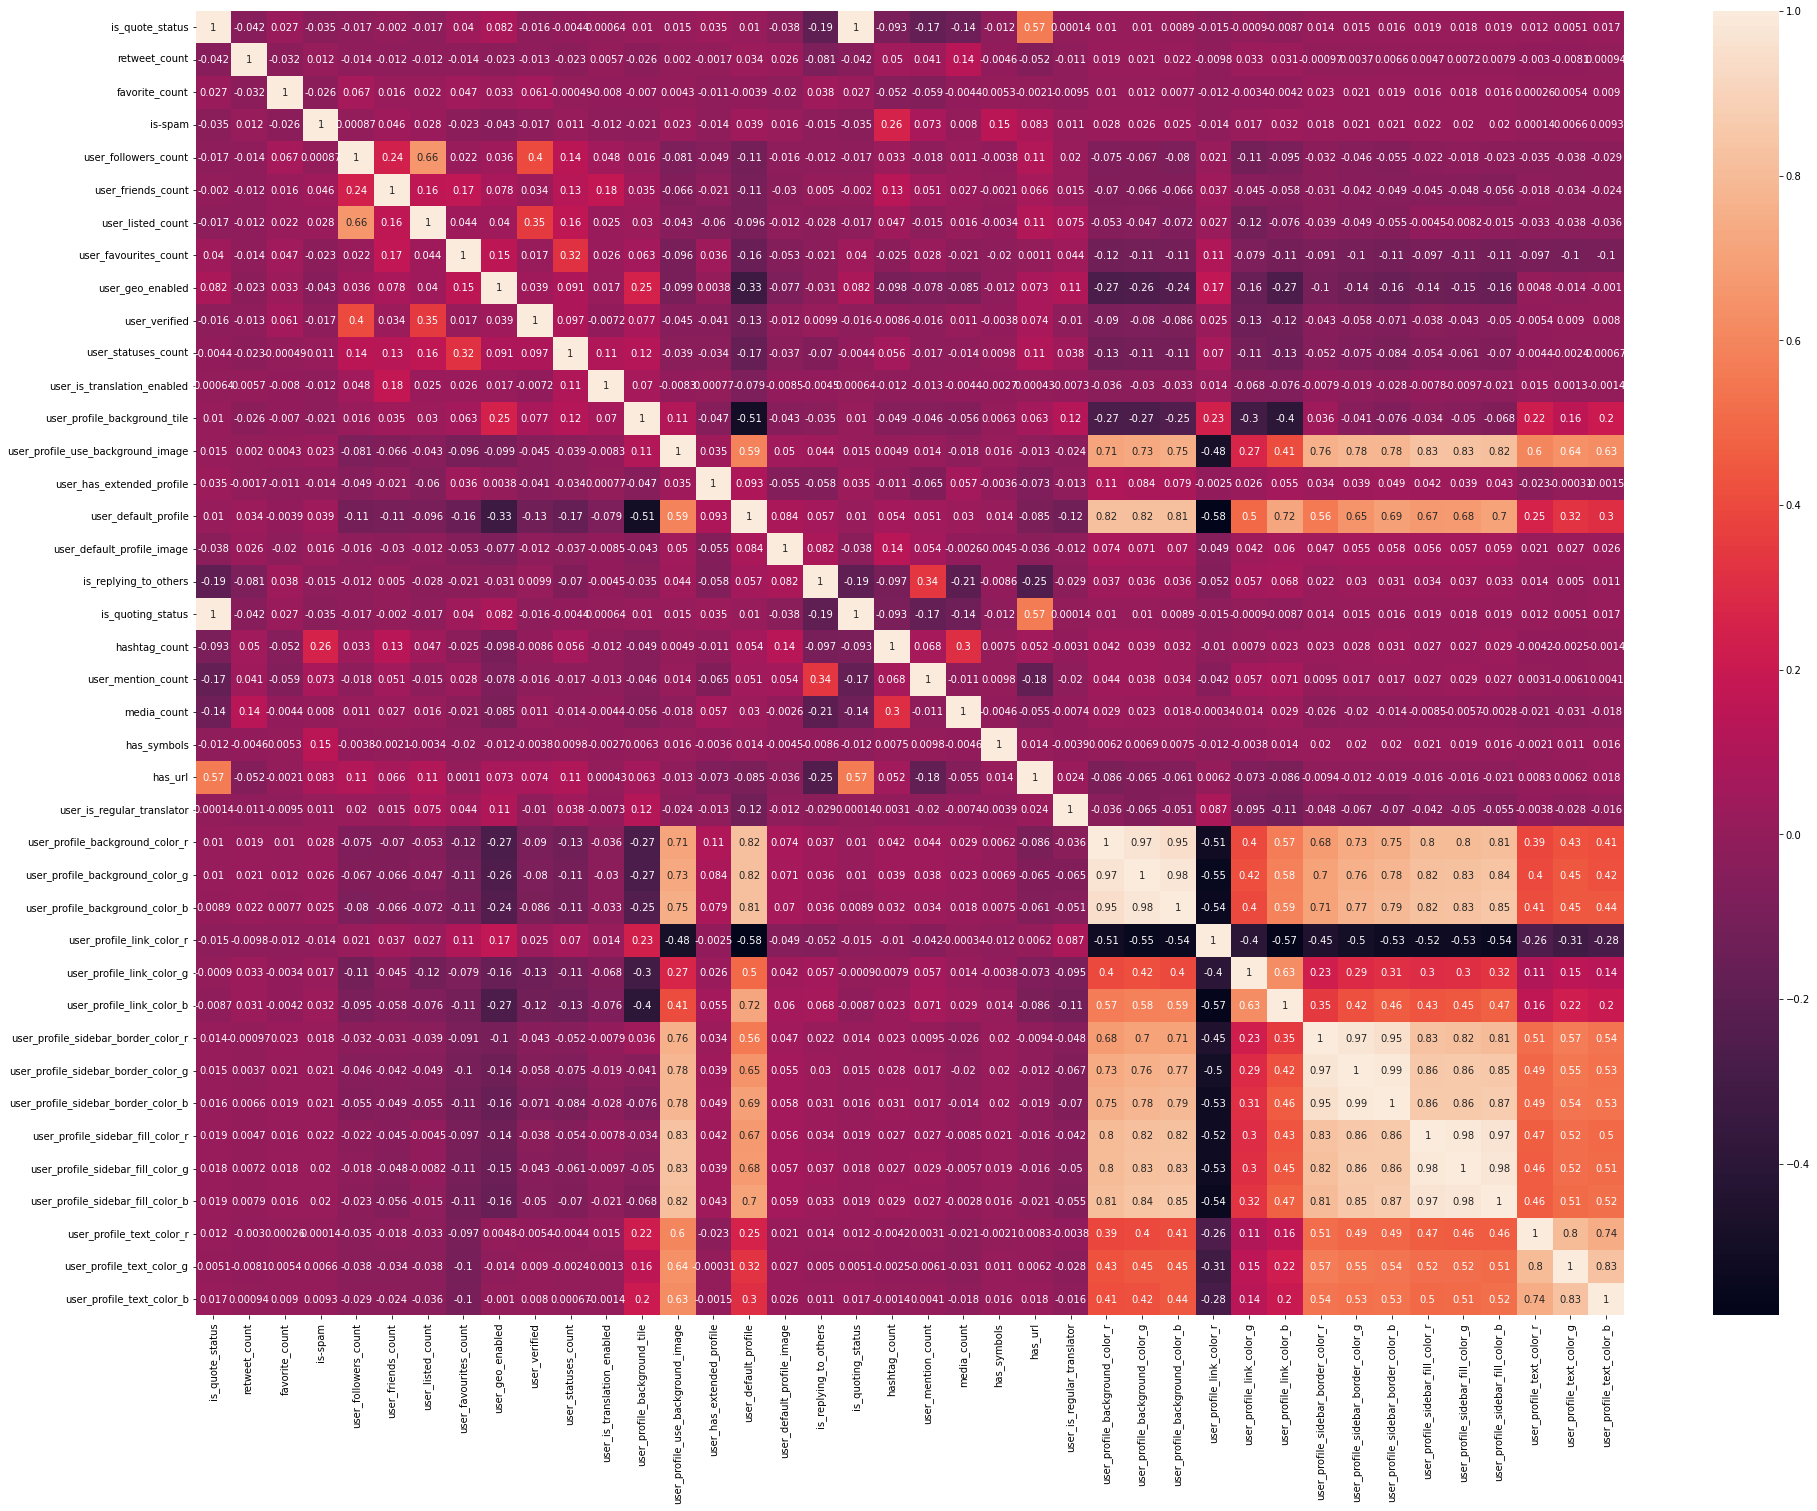

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(32,24))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

To-do:
1. Impute possibly_sensitive from tweet texts

In [19]:
numeric_df.isnull().any()

is_quote_status                        False
retweet_count                          False
favorite_count                         False
is-spam                                False
user_followers_count                   False
user_friends_count                     False
user_listed_count                      False
user_favourites_count                  False
user_geo_enabled                       False
user_verified                          False
user_statuses_count                    False
user_is_translation_enabled            False
user_profile_background_tile           False
user_profile_use_background_image      False
user_has_extended_profile              False
user_default_profile                   False
user_default_profile_image             False
is_replying_to_others                  False
is_quoting_status                      False
hashtag_count                          False
user_mention_count                     False
media_count                            False
has_symbol

In [20]:
# Trying to insert Random Forest algorithm to the data to see which one matters more.
predictors = numeric_df.drop('is-spam', axis=1)
target = numeric_df['is-spam']

from sklearn.ensemble import ExtraTreesClassifier

tree_classifier = ExtraTreesClassifier(n_estimators=50)
tree_classifier = tree_classifier.fit(predictors, target)

In [21]:
tree_classifier.feature_importances_

array([5.91440261e-03, 7.16740950e-02, 2.23766718e-02, 1.09704380e-01,
       1.16640986e-01, 6.40501731e-02, 9.74754728e-02, 1.14849491e-02,
       3.26292773e-04, 1.08318575e-01, 9.45955992e-05, 3.79326508e-03,
       2.84774683e-03, 2.14083064e-02, 3.03427272e-03, 3.68251435e-03,
       1.23735680e-02, 4.42163972e-03, 1.24195367e-01, 5.43067548e-02,
       2.00865882e-02, 2.42686287e-02, 1.91712638e-02, 1.42189405e-03,
       9.31651668e-03, 8.63640491e-03, 7.88453237e-03, 9.27010406e-03,
       1.05735530e-02, 1.43291901e-02, 3.35743646e-03, 5.03029384e-03,
       3.60615980e-03, 6.27238463e-03, 5.82080972e-03, 4.43211097e-03,
       2.98915483e-03, 2.52768508e-03, 2.88126079e-03])

In [22]:
feature_importance_df = pd.DataFrame({
    'feature': predictors.columns,
    'importance': tree_classifier.feature_importances_
})

In [23]:
best_features = feature_importance_df.nlargest(16, 'importance')
best_features.drop(29, inplace=True)
best_features

feature  importance
18              hashtag_count    0.124195
4          user_friends_count    0.116641
3        user_followers_count    0.109704
9         user_statuses_count    0.108319
6       user_favourites_count    0.097475
1               retweet_count    0.071674
5           user_listed_count    0.064050
19         user_mention_count    0.054307
21                has_symbols    0.024269
2              favorite_count    0.022377
13  user_has_extended_profile    0.021408
20                media_count    0.020087
22                    has_url    0.019171
16      is_replying_to_others    0.012374
7            user_geo_enabled    0.011485

Verdict: the following attributes are the best candidates for features:
1. Hashtag count
2. User friends count
3. User followers count
4. User statuses count
5. Retweet count
6. User favourites count
7. User listed count
8. User mention count
9. Has symbols
10. User has extended profile
11. Favourites count
12. Media count
13. Has url
14. Is replying to others
15. User geo enabled

In [24]:
# Further processing via Orange
numeric_df.to_csv('../dataset/numeric-dataset.csv')
tweet_df.to_json('../dataset/tweet-selected.json', orient="index")

Continuing from sensitive-content-imputer:
> Verdict: none of the tweets tagged with 'possibly sensitive' is sensitive.

Continuing as usual.

## Natural language processing
The following cells onward tries to process texts.

In [25]:
tweets = tweet_df[['is-spam', 'inferred_text']].rename({'inferred_text': 'raw_text'}, axis=1)
tweets.head()

is-spam                                           raw_text
0        0  My Mel Medarda cosplay 🖤 i’m still not over th...
1        0  Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...
2        0  More practice\nhomies I still hate doing full ...
3        0  Right at it again. \n\n#Arcane #piltoversfines...
4        0  self proclaimed free thinkers when arcane jinx...

In [26]:
import nltk
import string
import re

In [27]:
# Uncomment this if NLTK had not been downloaded yet
# nltk.download()

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
punctuation_gensim = re.sub('([.,?!])','', string.punctuation)
punctuation_gensim

'"#$%&\'()*+-/:;<=>@[\\]^_`{|}~'

In [30]:
# 1st: remove Twitter quirks.
def remove_twitter(text, for_gensim = False):
    twitter_stripped_text = re.sub('(\@[A-Za-z0-9_]+)', '', text)   # Username removal
    twitter_stripped_text = re.sub(r'([http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*))', '', twitter_stripped_text)   # Link removal
    twitter_stripped_text = re.sub('(\#[A-Za-z]+)', '', twitter_stripped_text) if for_gensim else re.sub('(\#)', ' ', twitter_stripped_text)  # Hashtag removal, but preserving the word
    twitter_stripped_text = re.sub('([-&])', ' ', twitter_stripped_text)   # dash spacing, accommodating for better representation in spams
    return twitter_stripped_text

tweets['clean_text'] = tweets['raw_text'].apply(lambda x: remove_twitter(x))
tweets['clean_text_gensim'] = tweets['raw_text'].apply(lambda x: remove_twitter(x, for_gensim=True))
tweets.head()

is-spam                                           raw_text  \
0        0  My Mel Medarda cosplay 🖤 i’m still not over th...   
1        0  Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...   
2        0  More practice\nhomies I still hate doing full ...   
3        0  Right at it again. \n\n#Arcane #piltoversfines...   
4        0  self proclaimed free thinkers when arcane jinx...   

                                          clean_text  \
0  My Mel Medarda cosplay 🖤 i’m still not over th...   
1  Made a smol gif with my fav cupcakes🧁💜❤️\n Arc...   
2  More practice\nhomies I still hate doing full ...   
3   Right at it again. \n\n Arcane  piltoversfinest    
4  self proclaimed free thinkers when arcane jinx...   

                                   clean_text_gensim  
0  My Mel Medarda cosplay 🖤 i’m still not over th...  
1       Made a smol gif with my fav cupcakes🧁💜❤️\n    
2  More practice\nhomies I still hate doing full ...  
3                          Right at it again. \n\n    
4  self proclaimed free thinkers when arcane jinx...

In [31]:
# 2nd: remove punctuation
def remove_punctuation(text, for_gensim=False):
    clean_text = "".join([i for i in text if i not in punctuation_gensim]) if for_gensim else "".join([i for i in text if i not in string.punctuation])
    clean_text = re.sub('([’])', "'", clean_text)
    return clean_text

tweets['clean_text'] = tweets['clean_text'].apply(lambda x: remove_punctuation(x))
tweets['clean_text_gensim'] = tweets['clean_text_gensim'].apply(lambda x: remove_punctuation(x, for_gensim=True))
tweets.head()

is-spam                                           raw_text  \
0        0  My Mel Medarda cosplay 🖤 i’m still not over th...   
1        0  Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...   
2        0  More practice\nhomies I still hate doing full ...   
3        0  Right at it again. \n\n#Arcane #piltoversfines...   
4        0  self proclaimed free thinkers when arcane jinx...   

                                          clean_text  \
0  My Mel Medarda cosplay 🖤 i'm still not over th...   
1  Made a smol gif with my fav cupcakes🧁💜❤️\n Arc...   
2  More practice\nhomies I still hate doing full ...   
3    Right at it again \n\n Arcane  piltoversfinest    
4  self proclaimed free thinkers when arcane jinx...   

                                   clean_text_gensim  
0  My Mel Medarda cosplay 🖤 i'm still not over th...  
1       Made a smol gif with my fav cupcakes🧁💜❤️\n    
2  More practice\nhomies I still hate doing full ...  
3                          Right at it again. \n\n    
4  self proclaimed free thinkers when arcane jinx...

In [32]:
# 3rd: strip emoji
import emoji

def remove_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text)

tweets['clean_text'] = tweets['clean_text'].apply(lambda x: remove_emoji(x))
tweets['clean_text_gensim'] = tweets['clean_text_gensim'].apply(lambda x: remove_emoji(x))
tweets.head()

is-spam                                           raw_text  \
0        0  My Mel Medarda cosplay 🖤 i’m still not over th...   
1        0  Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...   
2        0  More practice\nhomies I still hate doing full ...   
3        0  Right at it again. \n\n#Arcane #piltoversfines...   
4        0  self proclaimed free thinkers when arcane jinx...   

                                          clean_text  \
0  My Mel Medarda cosplay  i'm still not over thi...   
1  Made a smol gif with my fav cupcakes\n Arcane ...   
2  More practice\nhomies I still hate doing full ...   
3    Right at it again \n\n Arcane  piltoversfinest    
4  self proclaimed free thinkers when arcane jinx...   

                                   clean_text_gensim  
0  My Mel Medarda cosplay  i'm still not over thi...  
1           Made a smol gif with my fav cupcakes\n    
2  More practice\nhomies I still hate doing full ...  
3                          Right at it again. \n\n    
4  self proclaimed free thinkers when arcane jinx...

In [33]:
nltk.tokenize.word_tokenize(tweets['clean_text'].iloc[1], preserve_line=True)

['Made',
 'a',
 'smol',
 'gif',
 'with',
 'my',
 'fav',
 'cupcakes',
 'Arcane',
 'piltoversfinest']

In [34]:
# 4th: make a Tokenizer
tweets['tokenized_text'] = tweets['clean_text'].apply(nltk.tokenize.word_tokenize)
tweets['tokenized_text_gensim'] = tweets['clean_text_gensim'].apply(nltk.tokenize.word_tokenize)
tweets.head()

is-spam                                           raw_text  \
0        0  My Mel Medarda cosplay 🖤 i’m still not over th...   
1        0  Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...   
2        0  More practice\nhomies I still hate doing full ...   
3        0  Right at it again. \n\n#Arcane #piltoversfines...   
4        0  self proclaimed free thinkers when arcane jinx...   

                                          clean_text  \
0  My Mel Medarda cosplay  i'm still not over thi...   
1  Made a smol gif with my fav cupcakes\n Arcane ...   
2  More practice\nhomies I still hate doing full ...   
3    Right at it again \n\n Arcane  piltoversfinest    
4  self proclaimed free thinkers when arcane jinx...   

                                   clean_text_gensim  \
0  My Mel Medarda cosplay  i'm still not over thi...   
1           Made a smol gif with my fav cupcakes\n     
2  More practice\nhomies I still hate doing full ...   
3                          Right at it again. \n\n     
4  self proclaimed free thinkers when arcane jinx...   

                                      tokenized_text  \
0  [My, Mel, Medarda, cosplay, i, 'm, still, not,...   
1  [Made, a, smol, gif, with, my, fav, cupcakes, ...   
2  [More, practice, homies, I, still, hate, doing...   
3    [Right, at, it, again, Arcane, piltoversfinest]   
4  [self, proclaimed, free, thinkers, when, arcan...   

                               tokenized_text_gensim  
0  [My, Mel, Medarda, cosplay, i, 'm, still, not,...  
1      [Made, a, smol, gif, with, my, fav, cupcakes]  
2  [More, practice, homies, I, still, hate, doing...  
3                          [Right, at, it, again, .]  
4  [self, proclaimed, free, thinkers, when, arcan...

In [35]:
# 5th: remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    nostop_text = [i for i in text if i not in stopwords]
    return nostop_text

tweets['nostop_text'] = tweets['tokenized_text'].apply(lambda x: remove_stopwords(x))
tweets.head()

is-spam                                           raw_text  \
0        0  My Mel Medarda cosplay 🖤 i’m still not over th...   
1        0  Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...   
2        0  More practice\nhomies I still hate doing full ...   
3        0  Right at it again. \n\n#Arcane #piltoversfines...   
4        0  self proclaimed free thinkers when arcane jinx...   

                                          clean_text  \
0  My Mel Medarda cosplay  i'm still not over thi...   
1  Made a smol gif with my fav cupcakes\n Arcane ...   
2  More practice\nhomies I still hate doing full ...   
3    Right at it again \n\n Arcane  piltoversfinest    
4  self proclaimed free thinkers when arcane jinx...   

                                   clean_text_gensim  \
0  My Mel Medarda cosplay  i'm still not over thi...   
1           Made a smol gif with my fav cupcakes\n     
2  More practice\nhomies I still hate doing full ...   
3                          Right at it again. \n\n     
4  self proclaimed free thinkers when arcane jinx...   

                                      tokenized_text  \
0  [My, Mel, Medarda, cosplay, i, 'm, still, not,...   
1  [Made, a, smol, gif, with, my, fav, cupcakes, ...   
2  [More, practice, homies, I, still, hate, doing...   
3    [Right, at, it, again, Arcane, piltoversfinest]   
4  [self, proclaimed, free, thinkers, when, arcan...   

                               tokenized_text_gensim  \
0  [My, Mel, Medarda, cosplay, i, 'm, still, not,...   
1      [Made, a, smol, gif, with, my, fav, cupcakes]   
2  [More, practice, homies, I, still, hate, doing...   
3                          [Right, at, it, again, .]   
4  [self, proclaimed, free, thinkers, when, arcan...   

                                         nostop_text  
0  [My, Mel, Medarda, cosplay, 'm, still, show, a...  
1  [Made, smol, gif, fav, cupcakes, Arcane, pilto...  
2  [More, practice, homies, I, still, hate, full,...  
3                   [Right, Arcane, piltoversfinest]  
4  [self, proclaimed, free, thinkers, arcane, jin...

In [36]:
# checking out spam words
tweets[tweets['is-spam'] == 1]

is-spam                                           raw_text  \
9           1  @ArcaneLeague has just launched ! 🔥\n\nA BSC t...   
77          1  VALORANT ARCANE COLLECTOR’S SET BUNDLE GIVEAWA...   
147         1  @pim_arcane @Dr_Pinhead Please watch my video....   
216         1  Fight like Jinx, Vi, Caitlyn, and Jayce in PUB...   
300         1  #BTS (#방탄소년단) Official Light Stick - Wireless ...   
...       ...                                                ...   
4028        1  Watch ‘Real-Life’ Version of ‘Squid Game’ With...   
4029        1  Watch ‘Real-Life’ Version of ‘Squid Game’ With...   
4054        1  @binance @cz_binance $Marbles of Squid game \n...   
4108        1  In #CyberNation a #Cyberian gets to play a fai...   
4112        1  a e i o u  shot!\nNew drop E-pig SQ game colle...   

                                             clean_text  \
9      has just launched  \n\nA BSC token with NFTs ...   
77    VALORANT ARCANE COLLECTOR'S SET BUNDLE GIVEAWA...   
147     Please watch my video \nMade a theory video ...   
216   Fight like Jinx Vi Caitlyn and Jayce in PUBG M...   
300    BTS  방탄소년단 Official Light Stick   Wireless Co...   
...                                                 ...   
4028  Watch ‘Real Life' Version of ‘Squid Game' With...   
4029  Watch ‘Real Life' Version of ‘Squid Game' With...   
4054    Marbles of Squid game \nSame dev with Squid ...   
4108  In  CyberNation a  Cyberian gets to play a fai...   
4112  a e i o u  shot\nNew drop E pig SQ game collec...   

                                      clean_text_gensim  \
9      has just launched ! \n\nA BSC token with NFTs...   
77    VALORANT ARCANE COLLECTOR'S SET BUNDLE GIVEAWA...   
147     Please watch my video. \nMade a theory video...   
216   Fight like Jinx, Vi, Caitlyn, and Jayce in PUB...   
300    방탄소년단 Official Light Stick   Wireless Control...   
...                                                 ...   
4028  Watch ‘Real Life' Version of ‘Squid Game' With...   
4029  Watch ‘Real Life' Version of ‘Squid Game' With...   
4054    Marbles of Squid game \nSame dev with Squid ...   
4108  In  a  gets to play a fair game under the same...   
4112  a e i o u  shot!\nNew drop E pig SQ game colle...   

                                         tokenized_text  \
9     [has, just, launched, A, BSC, token, with, NFT...   
77    [VALORANT, ARCANE, COLLECTOR, 'S, SET, BUNDLE,...   
147   [Please, watch, my, video, Made, a, theory, vi...   
216   [Fight, like, Jinx, Vi, Caitlyn, and, Jayce, i...   
300   [BTS, 방탄소년단, Official, Light, Stick, Wireless,...   
...                                                 ...   
4028  [Watch, ‘, Real, Life, ', Version, of, ‘, Squi...   
4029  [Watch, ‘, Real, Life, ', Version, of, ‘, Squi...   
4054  [Marbles, of, Squid, game, Same, dev, with, Sq...   
4108  [In, CyberNation, a, Cyberian, gets, to, play,...   
4112  [a, e, i, o, u, shot, New, drop, E, pig, SQ, g...   

                                  tokenized_text_gensim  \
9     [has, just, launched, !, A, BSC, token, with, ...   
77    [VALORANT, ARCANE, COLLECTOR, 'S, SET, BUNDLE,...   
147   [Please, watch, my, video, ., Made, a, theory,...   
216   [Fight, like, Jinx, ,, Vi, ,, Caitlyn, ,, and,...   
300   [방탄소년단, Official, Light, Stick, Wireless, Cont...   
...                                                 ...   
4028  [Watch, ‘, Real, Life, ', Version, of, ‘, Squi...   
4029  [Watch, ‘, Real, Life, ', Version, of, ‘, Squi...   
4054  [Marbles, of, Squid, game, Same, dev, with, Sq...   
4108  [In, a, gets, to, play, a, fair, game, under, ...   
4112  [a, e, i, o, u, shot, !, New, drop, E, pig, SQ...   

                                            nostop_text  
9     [launched, A, BSC, token, NFTs, Play2Earn, Car...  
77    [VALORANT, ARCANE, COLLECTOR, 'S, SET, BUNDLE,...  
147   [Please, watch, video, Made, theory, video, Dr...  
216   [Fight, like, Jinx, Vi, Caitlyn, Jayce, PUBG, ...  
300   [BTS, 방탄소년단, Official, Light, Stick, Wireless,...  
...  

In [37]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    stem_text = [lemmatizer.lemmatize(i) for i in text]
    return stem_text

tweets['lemmatized_text'] = tweets['nostop_text'].apply(lambda x: lemmatize_text(x))
tweets.head(10)

is-spam                                           raw_text  \
0        0  My Mel Medarda cosplay 🖤 i’m still not over th...   
1        0  Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...   
2        0  More practice\nhomies I still hate doing full ...   
3        0  Right at it again. \n\n#Arcane #piltoversfines...   
4        0  self proclaimed free thinkers when arcane jinx...   
5        0  let’s make’em notice ⊹ ekko #arcane https://t....   
6        0  Third wheeling 🤙🤙\n#Arcane #Caitvi #Jinx https...   
7        0  Vi with everyone  /  Vi with Caitlyn\n#Arcane ...   
8        0  imagine we get an arcane 2 trailer where jinx ...   
9        1  @ArcaneLeague has just launched ! 🔥\n\nA BSC t...   

                                          clean_text  \
0  My Mel Medarda cosplay  i'm still not over thi...   
1  Made a smol gif with my fav cupcakes\n Arcane ...   
2  More practice\nhomies I still hate doing full ...   
3    Right at it again \n\n Arcane  piltoversfinest    
4  self proclaimed free thinkers when arcane jinx...   
5               let's make'em notice ⊹ ekko  arcane    
6            Third wheeling \n Arcane  Caitvi  Jinx    
7  Vi with everyone    Vi with Caitlyn\n Arcane  ...   
8  imagine we get an arcane 2 trailer where jinx ...   
9   has just launched  \n\nA BSC token with NFTs ...   

                                   clean_text_gensim  \
0  My Mel Medarda cosplay  i'm still not over thi...   
1           Made a smol gif with my fav cupcakes\n     
2  More practice\nhomies I still hate doing full ...   
3                          Right at it again. \n\n     
4  self proclaimed free thinkers when arcane jinx...   
5                      let's make'em notice ⊹ ekko     
6                               Third wheeling \n      
7  Vi with everyone    Vi with Caitlyn\n      \na...   
8  imagine we get an arcane 2 trailer where jinx ...   
9   has just launched ! \n\nA BSC token with NFTs...   

                                      tokenized_text  \
0  [My, Mel, Medarda, cosplay, i, 'm, still, not,...   
1  [Made, a, smol, gif, with, my, fav, cupcakes, ...   
2  [More, practice, homies, I, still, hate, doing...   
3    [Right, at, it, again, Arcane, piltoversfinest]   
4  [self, proclaimed, free, thinkers, when, arcan...   
5        [let, 's, make'em, notice, ⊹, ekko, arcane]   
6            [Third, wheeling, Arcane, Caitvi, Jinx]   
7  [Vi, with, everyone, Vi, with, Caitlyn, Arcane...   
8  [imagine, we, get, an, arcane, 2, trailer, whe...   
9  [has, just, launched, A, BSC, token, with, NFT...   

                               tokenized_text_gensim  \
0  [My, Mel, Medarda, cosplay, i, 'm, still, not,...   
1      [Made, a, smol, gif, with, my, fav, cupcakes]   
2  [More, practice, homies, I, still, hate, doing...   
3                          [Right, at, it, again, .]   
4  [self, proclaimed, free, thinkers, when, arcan...   
5                [let, 's, make'em, notice, ⊹, ekko]   
6                                  [Third, wheeling]   
7  [Vi, with, everyone, Vi, with, Caitlyn, anothe...   
8  [imagine, we, get, an, arcane, 2, trailer, whe...   
9  [has, just, launched, !, A, BSC, token, with, ...   

                                         nostop_text  \
0  [My, Mel, Medarda, cosplay, 'm, still, show, a...   
1  [Made, smol, gif, fav, cupcakes, Arcane, pilto...   
2  [More, practice, homies, I, still, hate, full,...   
3                   [Right, Arcane, piltoversfinest]   
4  [self, proclaimed, free, thinkers, arcane, jin...   
5        [let, 's, make'em, notice, ⊹, ekko, arcane]   
6            [Third, wheeling, Arcane, Caitvi, Jinx]   
7  [Vi, everyone, Vi, Caitlyn, Arcane, caitlyn, v...   
8  [imagine, get, arcane, 2, trailer, jinx, gf, c...   
9  [launched, A, BSC, token, NFTs, Play2Earn, Car...   

                                     lemmatized_text  
0  [My, Mel, Medarda, cosplay, 'm, still, show, a...  
1  [Made, smol, gif, fav, cupcake, Arcane, piltov...  
2  [More, practice, homies, I, still,

In [38]:
# favourite part: TF-IDF!
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=lambda x: x).fit(tweets['lemmatized_text'].values)
# tfidf_stuff = tfidf_vect.fit()
# tweets['tfidf'] = tweets['tfidf'].apply(toarray)
# tfidf_vect.fit_transform(tweets['lemmatized_text'])

In [39]:
# The following shows how much words we learn.
len(tfidf_vect.vocabulary_)

11041

In [40]:
tweets['lemmatized_text'].values

array([list(['My', 'Mel', 'Medarda', 'cosplay', "'m", 'still', 'show', 'arcane']),
       list(['Made', 'smol', 'gif', 'fav', 'cupcake', 'Arcane', 'piltoversfinest']),
       list(['More', 'practice', 'homies', 'I', 'still', 'hate', 'full', 'body', 'Im', 'really', 'forcing', 'hand', 'lmao', 'As', 'expected', 'Viktor', 'mashing', 'League', 'Arcane', 'one']),
       ...,
       list(['literally', 'spent', 'abt', '35', 'mill', 'recreate', 'squid', 'game', 'one', '25', 'min', 'long', 'video', 'ffs']),
       list(['I', 'HQVENT', 'WATCHED', 'MR', 'BEASTS', 'SQUID', 'GAME', 'VIDEO', 'YET', 'WAIT']),
       list(['His', 'new', 'squid', 'game', 'video', 'amazing'])],
      dtype=object)

In [41]:
x_encoded = tfidf_vect.transform(tweets['lemmatized_text'])
x_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

To-do: reduce the dimension to shorter dimensions. Let's say len(vocab)**0.25?

In [42]:
x_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
import gensim

# embedding_model = gensim.models.Word2Vec(tweets['tokenized_text_gensim'].values, vector_size=int(len(tfidf_vect.vocabulary_) ** 0.25))
embedding_model = gensim.models.Word2Vec(tweets['tokenized_text_gensim'].values, vector_size=50)

In [44]:
embedding_model.wv['dune']

array([ 4.5045978e-01, -1.5947370e-01, -1.2954395e-01, -8.7560415e-03,
        1.3416734e-01, -8.5283196e-01,  2.3591289e-01,  5.2392763e-01,
       -5.3915590e-01, -6.6370273e-01, -2.1988925e-01, -4.3578663e-01,
       -1.3973534e-01,  2.0969214e-01, -1.3580447e-01,  3.6445633e-01,
        5.6350344e-01,  2.2023509e-01, -7.7630568e-01, -1.4953941e-01,
        6.3098192e-02,  2.8503549e-01,  7.6347232e-01, -3.1218335e-01,
        5.1807421e-01,  1.4100543e-01, -4.0748793e-01,  1.9106314e-01,
       -5.1971692e-01, -6.5895520e-02,  1.0578111e-03, -1.6104664e-01,
       -3.0888885e-01,  2.3917155e-01, -3.6480594e-01,  6.4997606e-02,
        3.4362376e-01,  1.9794215e-01,  1.6103752e-04, -5.4508692e-01,
        3.1107572e-01,  3.6736526e-02, -8.4569849e-02,  4.0705323e-02,
        9.7159356e-01,  2.4128816e-01, -2.4567114e-01,  2.8699249e-02,
        2.4256302e-01,  1.9914864e-01], dtype=float32)

In [45]:
embedding_model.save('../model/tweets.embedding')

In [46]:
import numpy as np

# embedding_matrix = np.zeros((len(tfidf_vect.vocabulary_), int(len(tfidf_vect.vocabulary_) ** 0.25)))
embedding_matrix = np.zeros((len(tfidf_vect.vocabulary_), 50))

for word, i in tfidf_vect.vocabulary_.items():
    if word in embedding_model.wv.index_to_key:
        embedding_matrix[i] = embedding_model.wv[word]

embedding_matrix.shape

(11041, 50)

Here is the formula for our new matrix:

<img src="../resources/xencoded_formula.png">

In [47]:
print('x_encoded\nnDocs x nWords')
print(x_encoded.shape, end='\n\n')

print('embedding matrix\nnWords x 10')
print(embedding_matrix.shape, end='\n\n')

print("Output will be", "%d x %d" % (x_encoded.shape[0], embedding_matrix.shape[1]))

x_encoded
nDocs x nWords
(4157, 11041)

embedding matrix
nWords x 10
(11041, 50)

Output will be 4157 x 50


In [48]:
x_encoded_reduced = x_encoded.toarray() @ embedding_matrix  # matrix multiplication
x_encoded_reduced.shape

(4157, 50)

In [49]:
x_encoded.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
x_encoded_reduced

array([[ 0.52800977, -0.20998419, -0.18146145, ...,  0.0430741 ,
         0.45778283,  0.22838286],
       [ 0.14818105, -0.05714297, -0.04635271, ...,  0.0262815 ,
         0.10471617,  0.06348048],
       [ 0.71297598, -0.27029415, -0.208048  , ...,  0.07030081,
         0.43738774,  0.29543666],
       ...,
       [ 0.59155291, -0.21874773, -0.18928476, ...,  0.07705324,
         0.3982787 ,  0.24397322],
       [ 0.33192454, -0.13767187, -0.10622191, ...,  0.04278499,
         0.24286842,  0.13853369],
       [ 0.93033783, -0.32463678, -0.33359573, ...,  0.10688459,
         0.67006701,  0.38086622]])

Conclusion (for now!): x_encoded_reduced is a representation of a single tweet in terms of where they are in a vector. The original x_encoded contains word percentage; those values are multiplied to its respective 10-dimension vectors and then get summed, resulting in the average weight per tweet.

In [51]:
tweet_df = pd.concat([tweet_df, pd.DataFrame(x_encoded_reduced).add_prefix('vec_')], axis=1)

In [52]:
tweet_df.head() # Now we have vector representations.

is_quote_status  retweet_count  favorite_count  possibly_sensitive  \
0            False            247               0                 0.0   
1            False           2543               0                 0.0   
2            False            816               0                 NaN   
3            False           2687               0                 0.0   
4            False              0               0                 0.0   

                                       inferred_text  is-spam  \
0  My Mel Medarda cosplay 🖤 i’m still not over th...        0   
1  Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...        0   
2  More practice\nhomies I still hate doing full ...        0   
3  Right at it again. \n\n#Arcane #piltoversfines...        0   
4  self proclaimed free thinkers when arcane jinx...        0   

                    user_name             user_location  \
0                    Detavius      Wherever Shego, I go   
1  Cristiano #ARCANE SPOILERS         Rancharia, Brasil   
2               Mizi-deloafu🥖           In your Fantazi   
3                      𝐚𝐣𝐚𝐱 𖤐  lesbian - 19 - they/them   
4                       Zhyxx                 He/Him 17   

                                    user_description  user_followers_count  \
0    Owner of the the Dimmsdale Demon Time Dimmadome                  1452   
1  Design - Bauru\n\nIlustrador \n\nhttps://t.co/...                   176   
2  Digital multi-fandom artist/fan-artist \nInter...                    48   
3  𝘨𝘪𝘳𝘭 𝘨𝘳𝘰𝘶𝘱 𝘦𝘯𝘵𝘩𝘶𝘴𝘪𝘢𝘴𝘵! 💘 𝘰𝘯𝘤𝘦𝘮𝘪𝘥𝘻𝘺𝘪𝘯𝘴𝘰𝘮𝘯𝘪𝘢𝘤𝘰𝘳𝘣...                    21   
4  ~Good night~\ni play games\nEsp/Eng\n\npfp: @/...                   155   

   ...    vec_40    vec_41    vec_42    vec_43    vec_44    vec_45    vec_46  \
0  ...  0.466278  0.067953 -0.251913  0.106986  1.408329  0.461382 -0.314719   
1  ...  0.114854  0.012156 -0.051351  0.009402  0.352569  0.109051 -0.090185   
2  ...  0.500366  0.109100 -0.130674  0.052167  1.606052  0.420022 -0.392770   
3  ...  0.160209  0.016627 -0.045942  0.034811  0.492251  0.144090 -0.115983   
4  ...  0.230221  0.037889 -0.066517  0.031774  0.692398  0.203983 -0.149367   

     vec_47    vec_48    vec_49  
0  0.043074  0.457783  0.228383  
1  0.026282  0.104716  0.063480  
2  0.070301  0.437388  0.295437  
3  0.030251  0.159176  0.100163  
4  0.017939  0.195040  0.117355  

[5 rows x 96 columns]

In [53]:
numeric_df = pd.concat([numeric_df, pd.DataFrame(x_encoded_reduced).add_prefix('vec_')], axis=1)
numeric_df.head()

is_quote_status  retweet_count  favorite_count  is-spam  \
0            False            247               0        0   
1            False           2543               0        0   
2            False            816               0        0   
3            False           2687               0        0   
4            False              0               0        0   

   user_followers_count  user_friends_count  user_listed_count  \
0                  1452                1085                 14   
1                   176                1297                  0   
2                    48                 130                  0   
3                    21                 102                  1   
4                   155                 401                  3   

   user_favourites_count  user_geo_enabled  user_verified  ...    vec_40  \
0                  40794              True          False  ...  0.466278   
1                   7620             False          False  ...  0.114854   
2                   8648             False          False  ...  0.500366   
3                  16040             False          False  ...  0.160209   
4                   8729             False          False  ...  0.230221   

     vec_41    vec_42    vec_43    vec_44    vec_45    vec_46    vec_47  \
0  0.067953 -0.251913  0.106986  1.408329  0.461382 -0.314719  0.043074   
1  0.012156 -0.051351  0.009402  0.352569  0.109051 -0.090185  0.026282   
2  0.109100 -0.130674  0.052167  1.606052  0.420022 -0.392770  0.070301   
3  0.016627 -0.045942  0.034811  0.492251  0.144090 -0.115983  0.030251   
4  0.037889 -0.066517  0.031774  0.692398  0.203983 -0.149367  0.017939   

     vec_48    vec_49  
0  0.457783  0.228383  
1  0.104716  0.063480  
2  0.437388  0.295437  
3  0.159176  0.100163  
4  0.195040  0.117355  

[5 rows x 90 columns]

## Renewed analysis of numeric data frame

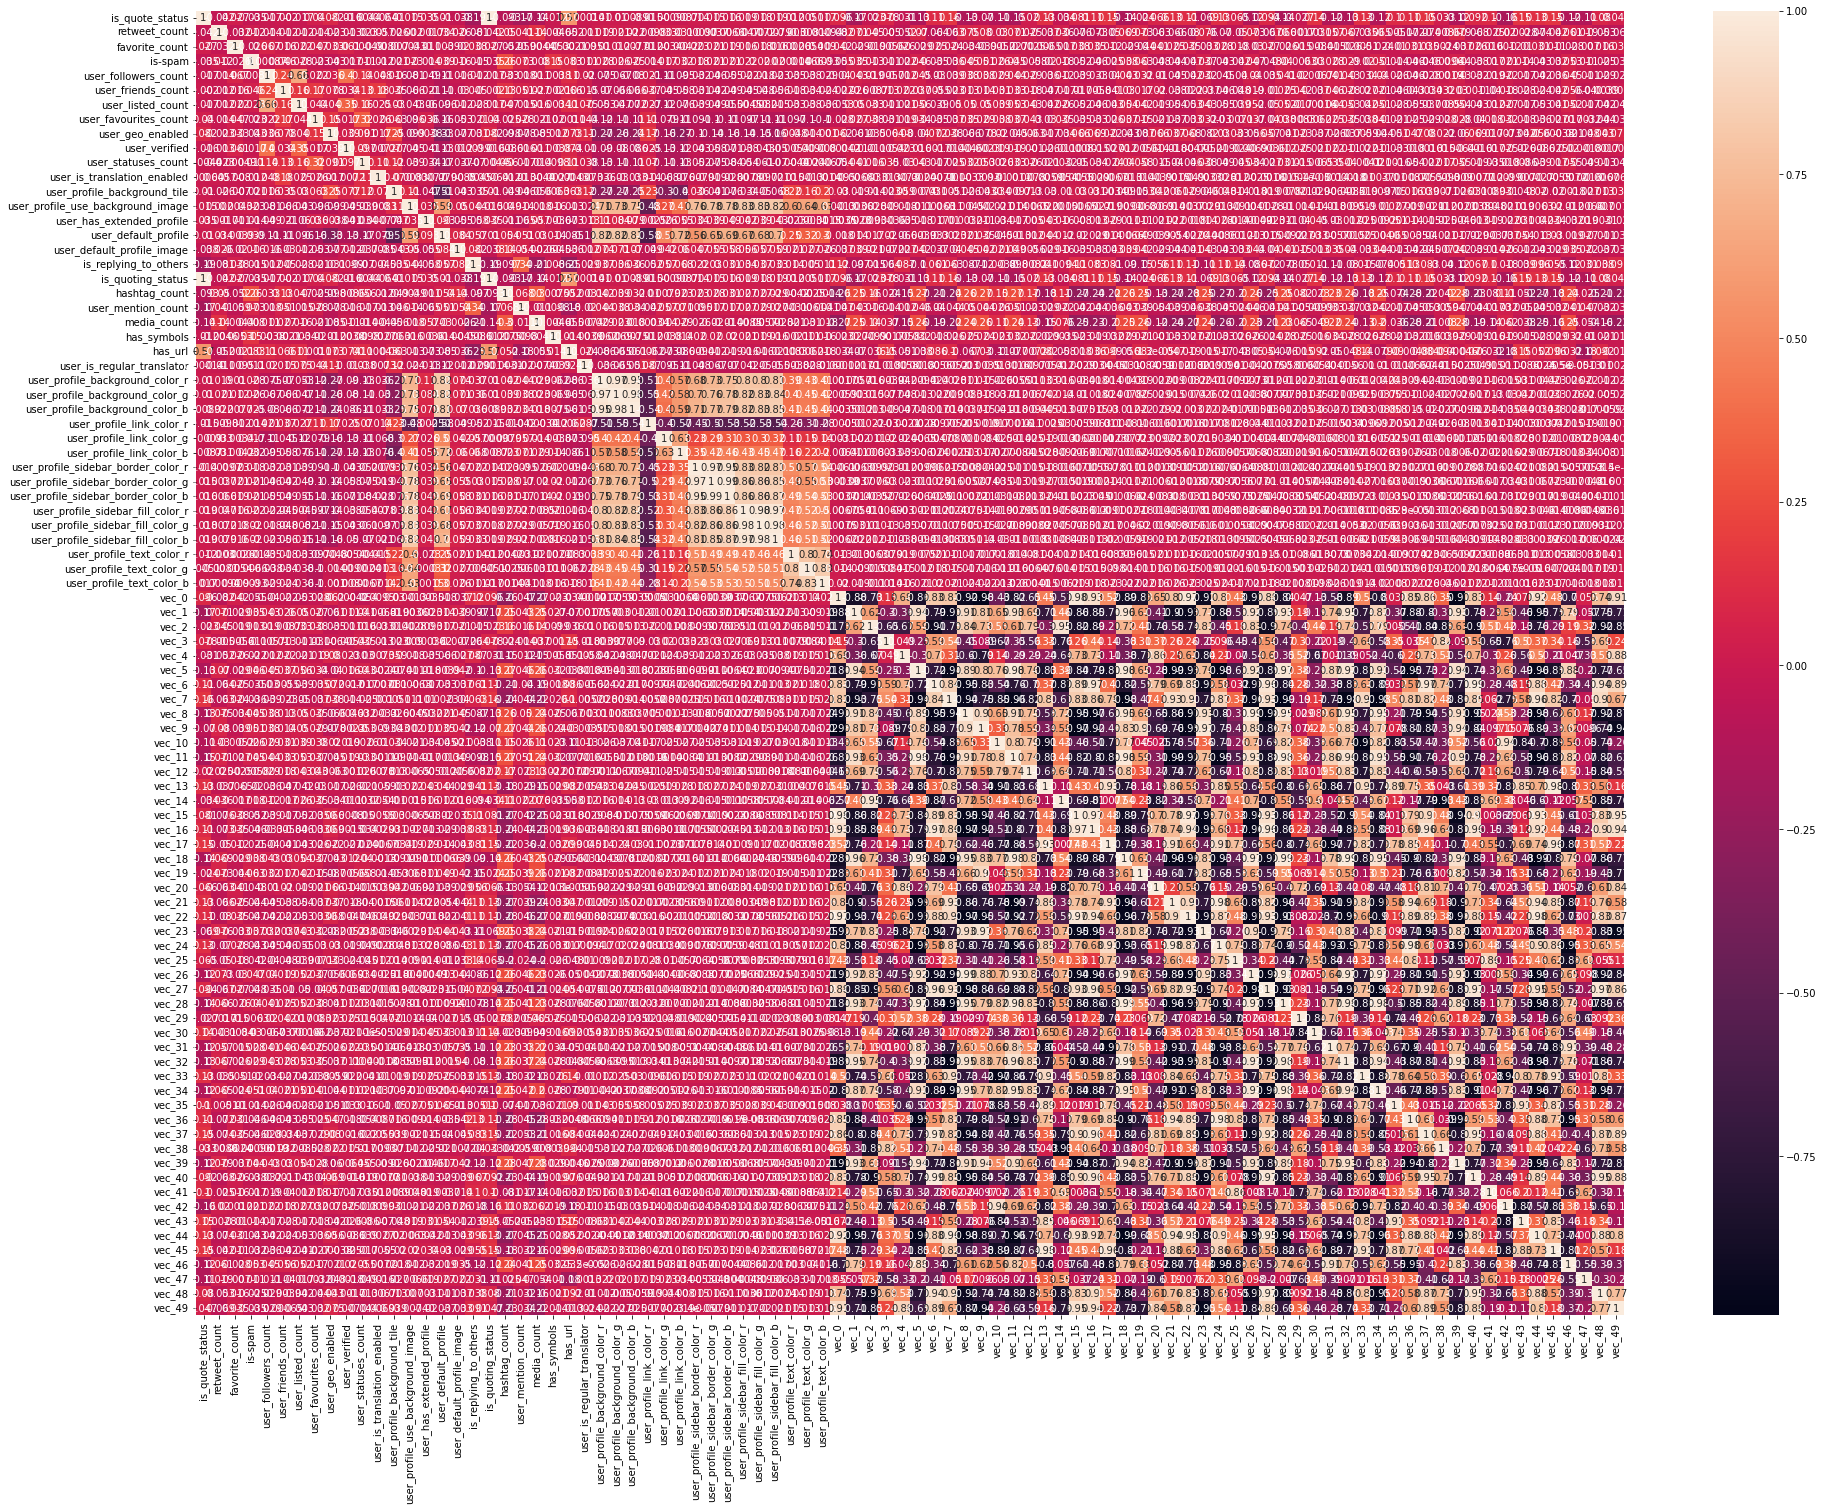

In [54]:
plt.figure(figsize=(32,24))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [55]:
numeric_df.to_csv('../dataset/numeric-dataset-vectorised.csv')

In [56]:
tweet_df.to_json('../dataset/tweet-vectorised.json', orient='index')
tweet_df.to_excel('../dataset/tweet-vectorised.xlsx')

In [57]:
# Revisit: sklearn feature selector
predictors = numeric_df.drop('is-spam', axis=1)
target = numeric_df['is-spam']

tree_classifier = ExtraTreesClassifier(n_estimators=50)
tree_classifier = tree_classifier.fit(predictors, target)

feature_importance_df = pd.DataFrame({
    'feature': predictors.columns,
    'importance': tree_classifier.feature_importances_
})

# best_features = feature_importance_df.nlargest(45, 'importance')
# best_features.drop(29, inplace=True)
# best_features

feature_importance_df.sort_values('importance', ascending=False)

feature  importance
18                hashtag_count    0.067251
51                       vec_12    0.023716
21                  has_symbols    0.021377
4            user_friends_count    0.019416
3          user_followers_count    0.018054
..                          ...         ...
36    user_profile_text_color_r    0.001823
37    user_profile_text_color_g    0.001575
23   user_is_regular_translator    0.001300
8                 user_verified    0.000131
10  user_is_translation_enabled    0.000000

[89 rows x 2 columns]

In [58]:
tweets.to_json('../dataset/tweet-processed.json', orient='index')